In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import linkage, dendrogram


In [20]:
# a cell for functions

# encode dataset
def encode(df, type = ''):

    if type == 'numeric':
        # encoder - get numeric categories
        lb_make = LabelEncoder()
        df_num = pd.DataFrame()
        for col in df.columns:
            df_num[col] = lb_make.fit_transform(df[col].astype('str'))

    elif type == 'dummies':
        # encoder - get dummy variables
        list_of_dummies = []
        for col in df.columns:
            dummy = pd.get_dummies(df[col]).rename(columns=lambda x: 'Category_' + str(x))
            list_of_dummies.append(dummy)
        df_num = pd.concat(list_of_dummies, axis = 1)
    else:
        print('Error in encode_df: wrong choise of type')
        df_num = pd.DataFrame([1])

    df_num.index = df.index
    df_num = df_num.fillna(0)

    return df_num

# check how many similar answers "competitor" has to all others
def check_equals(df, competitor):
    t = dict()
    for i in data.index:
        if competitor in i:
            t[i] = df.shape[1]
        else:
            tmp = df.loc[[competitor, i],:].transpose()
            tmp['Equal'] = tmp.loc[:,competitor] == tmp.loc[:,i]
            t[i] = tmp['Equal'].sum()
    
    return pd.DataFrame(t,index=['num_equal_ans']).transpose()

def plot_equals(df, competitor):

    df = check_equals(df, competitor)
    df = df.sort_values(by='num_equal_ans', ascending=False).drop(index=competitor)

    # plot
    ax = df.plot(kind='bar', figsize=(15,5),color='blue',alpha=0.2, title=f"Equal answers to {competitor}")
    for p in ax.patches:
            ax.annotate(str(p.get_height()), (p.get_x() , p.get_height()/ 2 ), size=15)

In [18]:
# import data
columns =  list(np.arange(8,98,3))
columns.append(5)
data = pd.read_excel('Totaloversikt.xlsx', sheet_name='Totaloversikt', usecols=columns, skiprows=1)

# drop columns and transpose
data = data.drop(index=[0,1,2,104,105,106]).reset_index().drop(columns='index').transpose()

display(data.head())

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
Mr. Fasit,>=34 min,>=10 min,Nei,FALLA Maiken Caspersen,3,Ja,KLAEBO Johannes Hoesflot,2,Nei,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AlexReinikka,>=34 min,6:00-7:59 min,Nei,NILSSON Stina,3,Ja,PELLEGRINO Federico,3,Nei,RYDZEK Johannes,...,0.5-2 s,2,3,12,6,Norge,0,131.5-133 m,Ja,Ja
Andørs Emmkø,32:00-33:59 min,6:00-7:59 min,Nei,NILSSON Stina,3,Ja,KLAEBO Johannes Hoesflot,2,Nei,RIIBER Jarl Magnus,...,5-10 s,3,4,20,11,Norge,0,135.5-137 m,Nei,Ja
Arne Jørgen Hauge,>=34 min,8:00-9:59 min,Nei,FALLA Maiken Caspersen,2,Ja,PELLEGRINO Federico,2,Nei,RYDZEK Johannes,...,10-15 s,2,2,17,5,Russland,0,135.5-137 m,Nei,Ja
ErlendLaukvik,30:00-31:59 min,>=10 min,Nei,DAHLQVIST Maja,2,Ja,KLAEBO Johannes Hoesflot,2,Nei,RIIBER Jarl Magnus,...,5-10 s,4,4,20,9,Norge,1,125.5-128 m,Nei,Nei


In [19]:
# endoce to dataset
numeric = encode(data,'numeric')
dummies = encode(data, 'dummies')

# import column for points
points = pd.read_excel('Totaloversikt.xlsx', sheet_name='Totaloversikt', usecols="E")

# drop fasit from data
data = data.drop(index='Mr. Fasit')

In [5]:
# must expand questions 
qs = pd.read_excel('Totaloversikt.xlsx', sheet_name='Totaloversikt', usecols="D").drop(index=[0,81]).reset_index().drop(columns='index')

# repeat question where neccesary
qs_expand = [24, 28, 31, 34, 35, 36, 44, 45, 46, 59, 60, 61, 64, 65, 66, 75, 76, 77, 85, 86, 87]

for i in qs_expand:
    q = qs.iloc[i - 1 ,0]
    line = pd.DataFrame({qs.columns[0]: q}, index=[i - 1  + 0.5])
    qs = qs.append(line, ignore_index=False)
    qs = qs.sort_index().reset_index(drop=True)

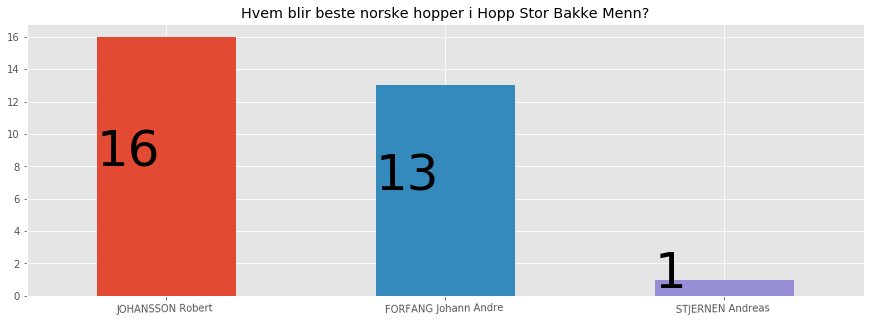

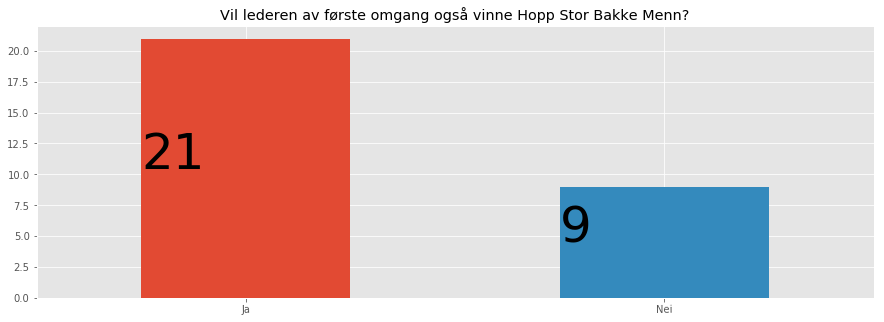

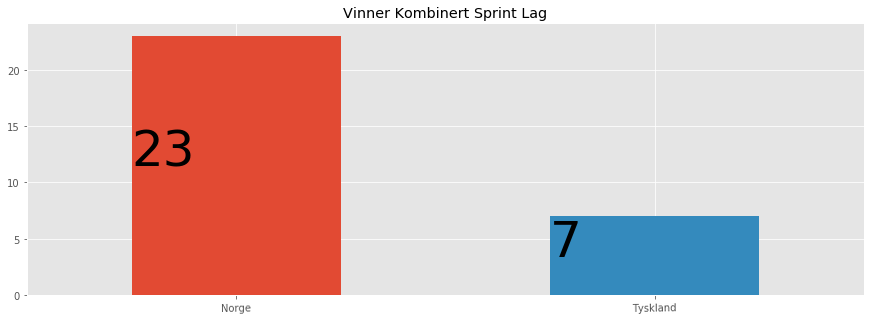

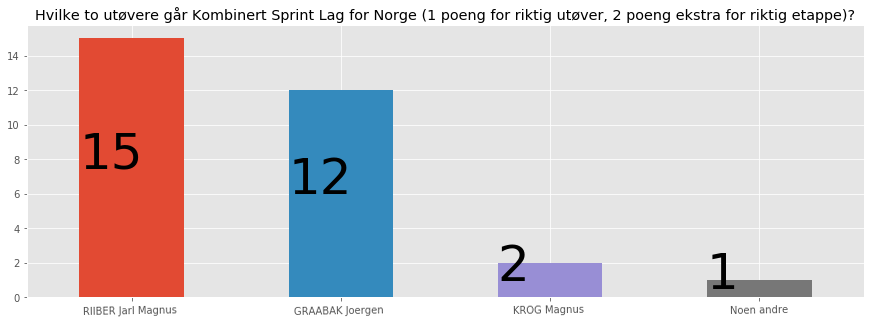

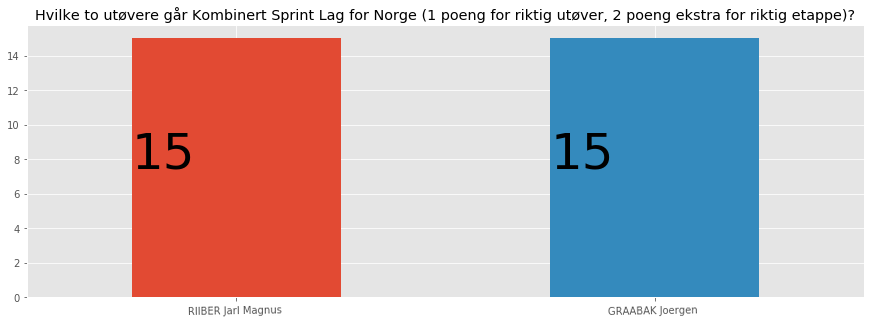

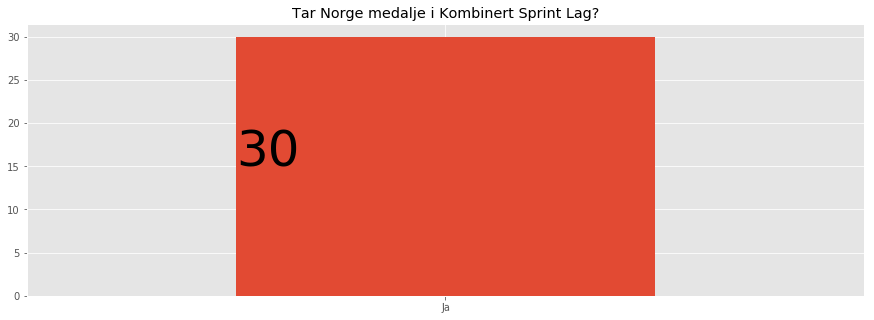

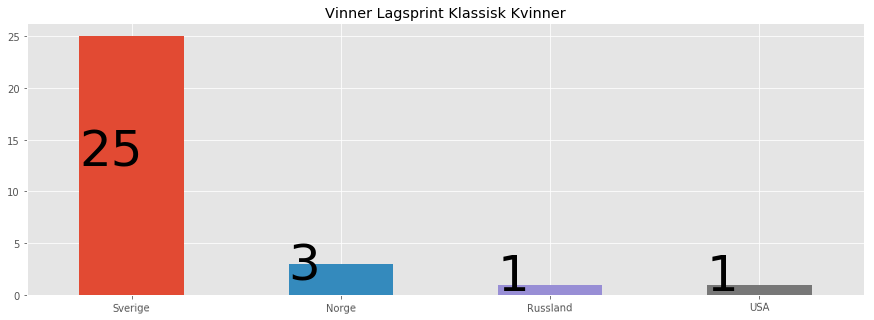

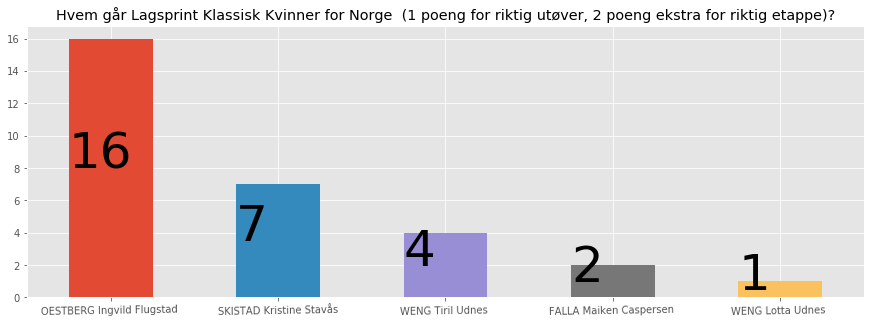

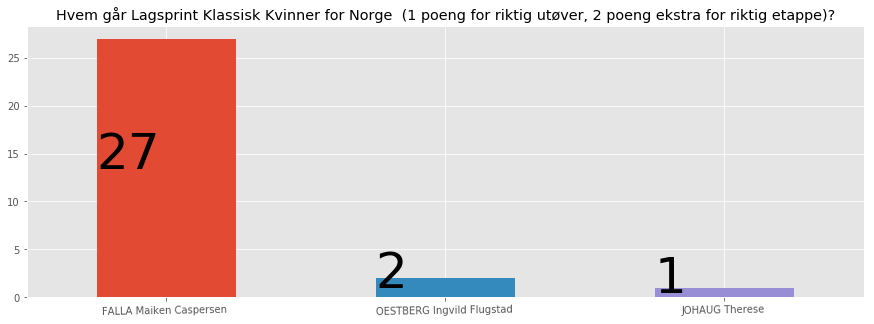

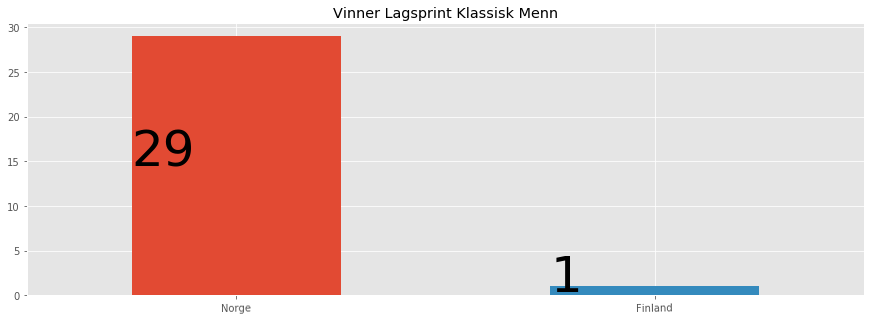

In [24]:
# count nuber of answers for respective question

for q in np.arange(20,30,1):
    q_data = data.loc[:,q].value_counts()
    
    ax = q_data.plot(kind='bar', figsize=(15,5), rot=1, title=qs.iloc[q,0])
    for p in ax.patches:
            ax.annotate(str(p.get_height()), (p.get_x() , p.get_height() / 2 ), size=50)
    plt.show()

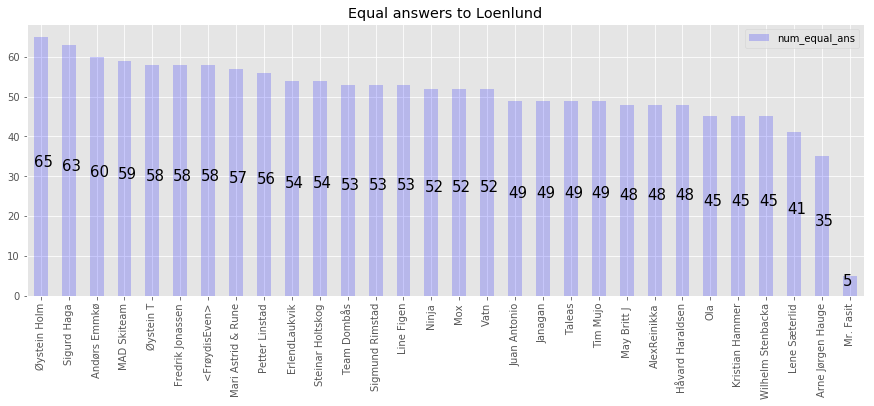

In [8]:
# check equals, and confirm that encoding is ok
better = 'Loenlund'
plot_equals(data, better)
#check_equals(numeric, better)
#check_equals(dummies, better)

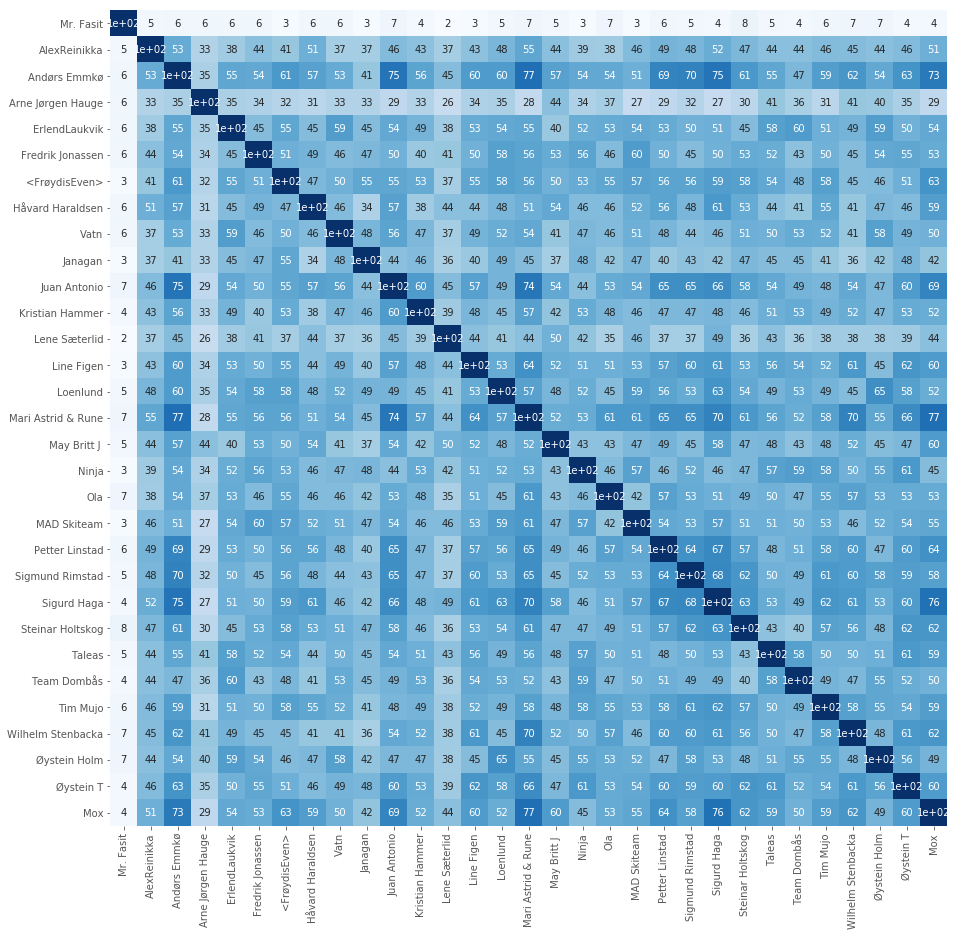

In [9]:
l = []

# create dataframe coparing all-to-all
for i in numeric.index:
    t = check_equals(numeric,i)
    l.append(t)
    
all_equals = pd.concat(l,axis=1)
all_equals.columns = all_equals.index

plt.figure(figsize=(15,15))
sns.heatmap(all_equals,annot=True, square=False,cbar=False, cmap='Blues')
plt.show()

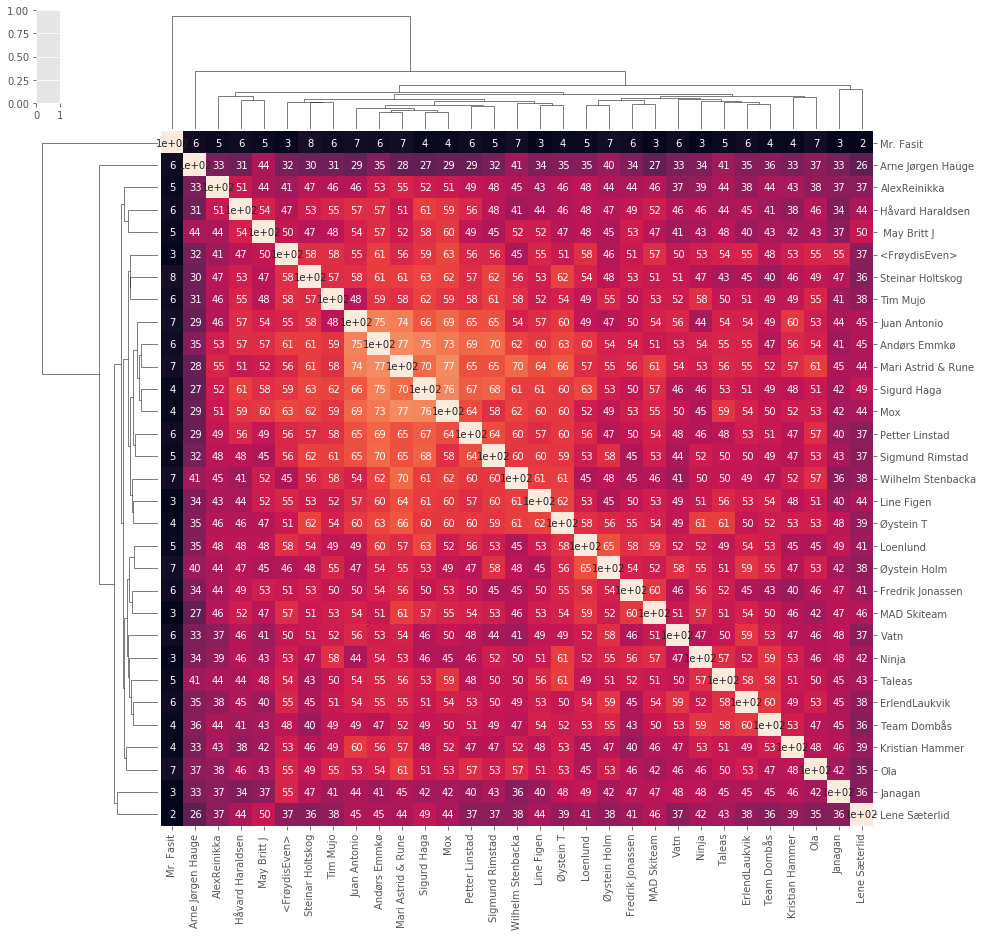

In [10]:
# clustermap - cluster people with high amonts of similar answers
sns.clustermap(all_equals,annot=True, square=False,cbar=False,figsize=(15,15))
plt.show()

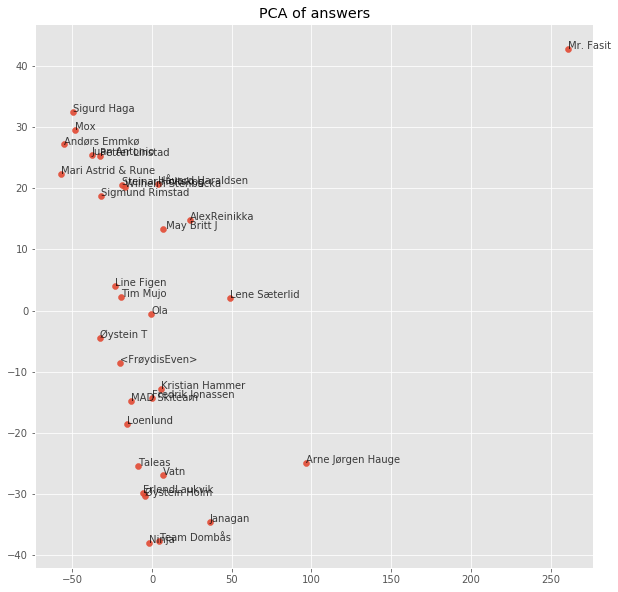

In [11]:
# data is OK, lets analyze

# apply principal component analysis on dummie encoded dataset. 
# Dummy encoded to get euceledian distance represented in algo.
p = PCA(n_components=2)
pca = p.fit_transform(all_equals.values)
plt.figure(figsize=(10,10))
plt.scatter(pca[:, 0], pca[:,1], alpha = 0.9)

# Annotate the points
for x, y, name in zip(pca[:,0], pca[:,1], data.index):
    plt.annotate(name, (x, y), fontsize=10, alpha=0.75)
plt.title('PCA of answers')
plt.show()

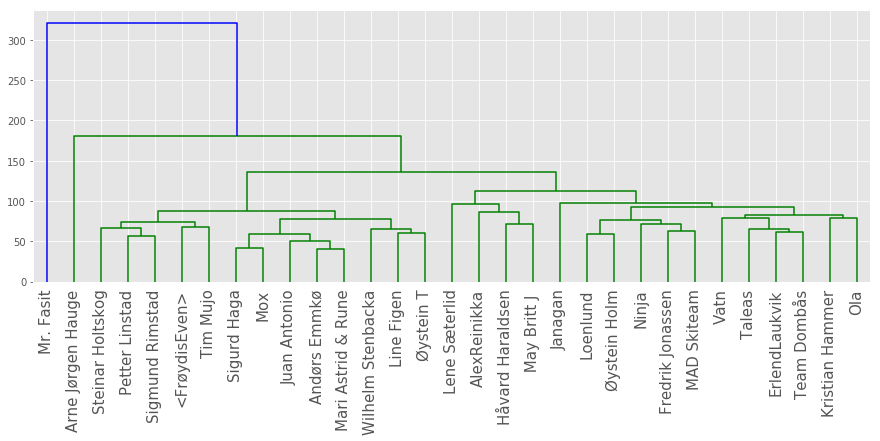

In [12]:
# Perform the necessary imports

# Calculate the linkage: mergings
mergings = linkage(all_equals, method='complete')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(15,5))
dendrogram(mergings,
           labels=data.index,
           leaf_rotation=90,
           leaf_font_size=15,
           )
plt.show()